## Grabbing S&P500 List
#### Top 500 companies based on market cap
#### market cap = no. of outstanding shares x price per share

In [30]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [1]:
import bs4 as bs
import pickle
import requests
import os

In [5]:
import pandas as pd
import pandas_datareader.data as web

In [7]:
style.use('ggplot')

In [13]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table',{'class':'wikitable sortable'})
    
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('\n','')
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    print(tickers)
    
    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CDW', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'C

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CDW',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CM

In [ ]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
            
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2010,1,1)
    end = dt.datetime(2019,1,1)
    
    for ticker in tickers[:50]:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker,'yahoo', start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
#get_data_from_yahoo()
            

### Combining Adj Close of all companies into one  main dataframe

In [16]:
def compile_data():
    with open("sp500tickers.pickle","rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers[:50]):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date',inplace=True)
        
        df.rename(columns = {'Adj Close':ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
            
        if count % 10 == 0:
            print(count)
    
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
    
compile_data()
    


0
10
20
30
40
                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
2009-12-31  64.376617  20.377853   NaN  8.73  33.685593  10.021834  36.779999   
2010-01-04  64.649193  20.555250   NaN  8.74  34.148254  10.193225  37.090000   
2010-01-05  64.244255  20.389175   NaN  8.53  34.359306  10.211267  37.700001   
2010-01-06  65.155350  20.502405   NaN  8.40  34.724575  10.157144  37.619999   
2010-01-07  65.202065  20.672255   NaN  8.40  34.692101   9.913588  36.889999   

             AMD        AAP        AES  ...       AMGN        APH        ADI  \
Date                                    ...                                    
2009-12-31  9.68  39.517174  10.652814  ...  46.652309  21.494581  24.434973   
2010-01-04  9.70  39.419548  10.940943  ...  47.600704  21.382872  24.504612   
2010-01-05  9.71  39.185253  10.828890  ...  47.188347  20.936033  24.465919   
2010-01-06  9.57  

### Visualize the combined data 

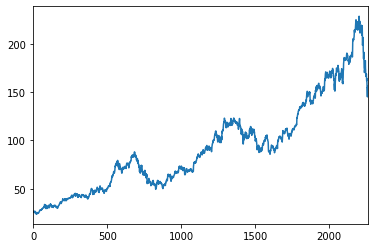

In [23]:
df = pd.read_csv('sp500_joined_closes.csv')
df['AAPL'].plot()
plt.show()

In [28]:
# correlaiton
df_corr = df.corr()
print(df_corr.head())

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.924979  0.928056  0.809345  0.963102  0.935270  0.899593   
ABT   0.924979  1.000000  0.927612  0.885675  0.953458  0.894185  0.939325   
ABBV  0.928056  0.927612  1.000000  0.890192  0.937002  0.916156  0.932840   
ABMD  0.809345  0.885675  0.890192  1.000000  0.905894  0.921578  0.975851   
ACN   0.963102  0.953458  0.937002  0.905894  1.000000  0.960364  0.954568   

           AMD       AAP       AES  ...      AMGN       APH       ADI  \
MMM   0.502231  0.704508  0.473061  ...  0.959289  0.985460  0.966154   
ABT   0.539578  0.703691  0.620005  ...  0.947897  0.955970  0.943574   
ABBV  0.750110  0.189895  0.328430  ...  0.888867  0.953886  0.931205   
ABMD  0.758603  0.494255  0.537966  ...  0.786611  0.874306  0.892069   
ACN   0.580446  0.690510  0.501941  ...  0.944997  0.983042  0.979137   

          ANSS      ANTM       AON       AOS       APA       AIV      AAPL  
MMM   0.911045 

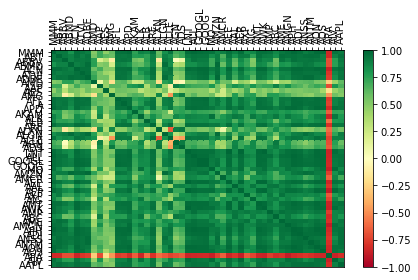

In [34]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    #print(df_corr.head())
    
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    
    plt.tight_layout()
    plt.show()
    
visualize_data()

##